# Statistiques computationnelles - TP 3 : Algorithme de Metropolis-Hasting

In [1]:
import numpy as np
import pylab as pl

## Exercice 2 : Metropolis-Hasting multiplicatif

### Question 1

On donne dans un premier temps une expression de $Y$ :
$$ Y = 1_{\mathcal{B} = 0} \dfrac{X}{\varepsilon} + 1_{\mathcal{B} = 1} \varepsilon X $$
Soit $g$ une fonction continue sur $\mathbb{R}$. On calcule l'espérance de $g(Y)$ :
$$ \mathbb{E}[g(Y)] = \dfrac{1}{2} \mathbb{E} \left[ g \left( \dfrac{X}{\varepsilon} \right) \right] + \dfrac{1}{2} \mathbb{E}[g(\varepsilon X)] $$

On calule la première espérance :
$$ \mathbb{E} \left[ g \left( \dfrac{X}{\varepsilon} \right) \right] = \int_{-1}^1 g \left( \dfrac{X}{x} \right) f(x) dx $$
On pose le changement de variable $x = h(y) = \dfrac{X}{y}$. $h$ est une bijection de $\left] -\infty, -|X| \right[$ dans $\left] 0, - \frac{X}{|X|} \right[$ et une bijection de $\left] |X|, \infty \right[$ dans $\left] 0, \frac{X}{|X|} \right[$. De plus $h$ est monotone sur ces deux intervales et :
$$ | h'(y) | = \dfrac{|X|}{y^2} \qquad \text{et} \qquad \left] 0, -\frac{X}{|X|} \right[ \cup \left] 0, \frac{X}{|X|} \right[ = ] -1, 1 [ \setminus \{ 0 \} $$
On obtient alors :
$$ \mathbb{E} \left[ g \left( \dfrac{X}{\varepsilon} \right) \right] = \int_{-\infty}^{-|X|} g \left( y \right) f \left( \dfrac{X}{y} \right) \dfrac{|X|}{y^2} dy + \int_{|X|}^{\infty} g \left( y \right) f \left( \dfrac{X}{y} \right) \dfrac{|X|}{y^2} dy $$

Ensuite on calcule la seconde espérance :
$$ \mathbb{E}[g(\varepsilon X)] = \int_{-1}^1 g \left( X x \right) f(x) dx $$
Cette fois-ci on fait le changement de variable $x = h(y) = \dfrac{y}{X}$ qui est strictement monotone de $] - |X|, |X| [$ dans $]-1, 1[$. D'où :
$$ \mathbb{E}[g(\varepsilon X)] = \int_{-|X|}^{|X|} g \left( y \right) f \left( \dfrac{y}{X} \right) \dfrac{1}{|X|} dy $$

Finalement on obtient l'espérance suivante :
$$ \mathbb{E}[g(Y)] = \dfrac{1}{2} \int_{-\infty}^{-|X|} g \left( y \right) f \left( \dfrac{X}{y} \right) \dfrac{|X|}{y^2} dy + \dfrac{1}{2} \int_{-|X|}^{|X|} g \left( y \right) f \left( \dfrac{y}{X} \right) \dfrac{1}{|X|} dy + \dfrac{1}{2} \int_{|X|}^{\infty} g \left( y \right) f \left( \dfrac{X}{y} \right) \dfrac{|X|}{y^2} dy $$
Enfin on identifie la la densité de $Y$ dans ces intégrales :
$$ \fbox{$ q(X, y) = 1_{|y| > |X|} f \left( \dfrac{X}{y} \right) \dfrac{|X|}{2 y^2} + 1_{|y| < |X|} f \left( \dfrac{y}{X} \right) \dfrac{1}{2 |X|} 
$} $$

### Question 2

$$ \begin{array}{lll}
	\alpha(x, y) & = & 1 \wedge \dfrac{\pi(y) q(y, x)}{\pi(x) q(x, y)} \\ \\
	& = & 1 \wedge \dfrac{\pi(y)}{\pi(x)} \dfrac{1_{|x| > |y|} f \left( \dfrac{y}{x} \right) \dfrac{|y|}{2 x^2} + 1_{|x| < |y|} f \left( \dfrac{x}{y} \right) \dfrac{1}{2 |y|}}{1_{|y| > |x|} f \left( \dfrac{x}{y} \right) \dfrac{|x|}{2 y^2} + 1_{|y| < |x|} f \left( \dfrac{y}{x} \right) \dfrac{1}{2 |x|}} \\ \\
	& = & 1 \wedge \dfrac{\pi(y)}{\pi(x)} \left( 1_{|x| > |y|} \dfrac{|y|}{|x|} + 1_{|x| < |y|} \dfrac{|y|}{|x|} \right) \\ \\
	& = & 1 \wedge \dfrac{\pi(y)}{\pi(x)} \dfrac{|y|}{|x|}
\end{array} $$

### Question 3

In [5]:
# Uniform sampler on ]-1, 1[
unif = lambda: np.random.rand()*2-1 

def HM(pi, f, nSteps):
    """
    Halting-Metropolis algorithm
    """
    X = unif()
    for _ in range(nSteps):
        e = f()
        B = np.round(np.random.rand())
        Y = e*X if B == 1 else X/e
        a = min(1, pi(Y) * abs(Y) / pi(X) / abs(X))
        if np.random.rand() < a:
            X = Y
    return X

On commence avec une gaussienne normalisée

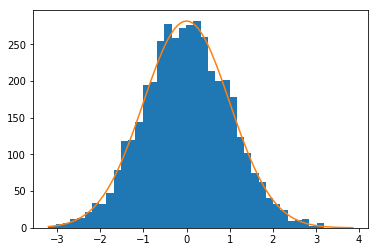

In [25]:
N = 4200
gauss = lambda x: np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
X = [HM(gauss, unif, 20) for _ in range(N)]
x0, x1 = min(X), max(X)
x = np.linspace(x0, x1, 100)
density = gauss(x) * 100*(x1-x0)

pl.hist(X, N//100)
pl.plot(x, density)
pl.show()

Puis on essaye avec une distribution de Laplace assymétrique

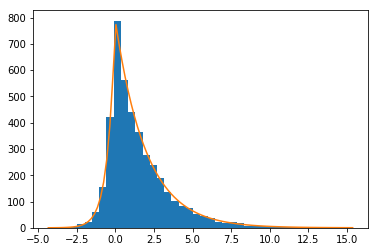

In [30]:
m, l, k = 0, 1, 0.5
def dist(x):
    if x < m:
        return l / (k + 1/k) * np.exp(l/k*(x-m))
    else:
        return l / (k + 1/k) * np.exp(-l*k*(x-m))
X = [HM(dist, unif, 20) for _ in range(N)]
x0, x1 = min(X), max(X)
x = np.linspace(x0, x1, 100)
density = [dist(a) * 100*(x1-x0) for a in x]

pl.hist(X, N//100)
pl.plot(x, density)
pl.show()